In [1]:
### Welcome to fast trader
# This is a simple python API for deploying trading 
# algorithims and testing them out quickly. 

## First release alpha 0.0.1 

In [2]:
import numpy as np 
import fast_trader as ft

In [3]:
### Read all time data for MSFT stock 
msft= ft.YahooStock('MSFT',start=None,end=None,interval='1d').history(adjusted=False)
msft 

<TraderDict:: shape=(5,[8653, 8653, 8653, 8653, 8653]), attrs=['high', 'volume', 'low', 'close', 'open'], name=MSFT>

In [4]:
### a trader dict is a dictionary with keys or attributes. Note that they are mainly storage points and not really 
## as fast as dataframes. The good thing is that they support different indexing and arrays of different sizes
## The real promise is that they have TraderArrays which are fast 
msft.attrs 

['high', 'volume', 'low', 'close', 'open']

In [5]:
msft.shape #shape is defined by number of items (msft.items) and the length of each attr columns 

(5, [8653, 8653, 8653, 8653, 8653])

In [6]:
msft.dropna(inplace=None) #drop all nans and dont replace 

In [7]:
msft.to_numpy()
msft.to_df().head(3) #conver to numpy or df 

high        volume       low     close      open
1986-03-13 10:30:00  0.101562  1.031789e+09  0.088542  0.097222  0.088542
1986-03-14 10:30:00  0.102431  3.081600e+08  0.097222  0.100694  0.097222
1986-03-17 10:30:00  0.103299  1.331712e+08  0.100694  0.102431  0.100694

In [8]:
## goign backward
ft.from_pd(msft.to_df())

<TraderDict:: shape=(5,[8653, 8653, 8653, 8653, 8653]), attrs=['high', 'volume', 'low', 'close', 'open'], name=dataframe>

In [9]:
msft.to_dict() #or to a dictionary

{'high': <TraderArray:: shape=(8653,), min=(0.09), max=(216.38), range=(03-13-1986,07-10-2020), name="high">,
 'volume': <TraderArray:: shape=(8653,), min=(2304000.00), max=(1031788800.00), range=(03-13-1986,07-10-2020), name="volume">,
 'low': <TraderArray:: shape=(8653,), min=(0.09), max=(211.47), range=(03-13-1986,07-10-2020), name="low">,
 'close': <TraderArray:: shape=(8653,), min=(0.09), max=(214.32), range=(03-13-1986,07-10-2020), name="close">,
 'open': <TraderArray:: shape=(8653,), min=(0.09), max=(216.33), range=(03-13-1986,07-10-2020), name="open">}

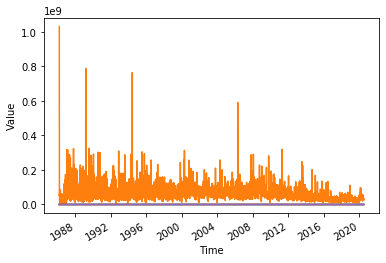

In [10]:
msft.plot()

<trader Date:: 2010-01-01 00:00:00>
2010-01-01 00:00:00
01-01-2010 00:00:00


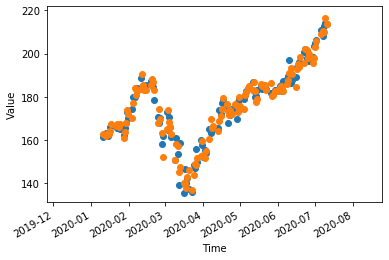

In [11]:
msft['01.10.2020':None,['close','open']].scatter() #multindexing for dates  

### note that all dates strings are interpreted in real time. Input can be a datetime as well
# '01-10-2020'=='2020-01-10'=='01/10/2020'=='01.10.2020'

td= ft.Date('01-01-2010') #The date class is what allows this flexibilty 
print(td)
print(td.to_datetime())
print(td.datestr())

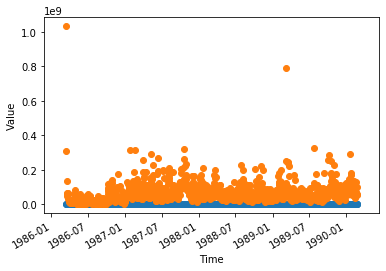

In [12]:
msft[0:1000,[0,1]].scatter() #multindexing for ints and colmuns

In [13]:
### inside Trader Dicts is the trader array, a very fast module array 

msft.close #close trader array 

<TraderArray:: shape=(8653,), min=(0.09), max=(214.32), range=(03-13-1986,07-10-2020), name="close">

In [14]:
msft.close.date_info #holds a trader date object 

<TraderDates:: shape=(8653,), start=1986-03-13 10:30:00, stop=2020-07-10 16:00:01>

In [15]:
msft.close.date_info.nearest_date(ft.year(2010)) #find nearest date to 01 01 2010

Timestamp('2009-12-31 10:30:00')

In [16]:
msft.close.date_info.dates[:10] #date info stored here

DatetimeIndex(['1986-03-13 10:30:00', '1986-03-14 10:30:00',
               '1986-03-17 10:30:00', '1986-03-18 10:30:00',
               '1986-03-19 10:30:00', '1986-03-20 10:30:00',
               '1986-03-21 10:30:00', '1986-03-24 10:30:00',
               '1986-03-25 10:30:00', '1986-03-26 10:30:00'],
              dtype='datetime64[ns]', freq=None)

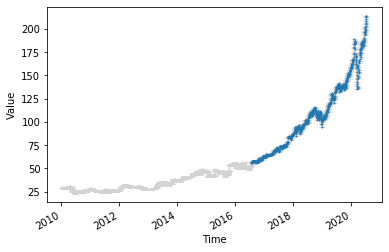

In [17]:
#### Getting into the cool stuff 

close = msft.close 
close[-1000:].scatter(s=1,zorder=2)#scatter indexed data 
close.date_range(start= '01-21-2010', end = None, nearest=False).plot(marker='_',color='lightgray',zorder=1) #plot data from 1/21/10 onward

#plot attributes use any matplotlib args 
#date range is 5x faster date indexing. Nearest will give the closest dates (default is false)

In [18]:
#numpy ops work here and preseve data information if they match 
print(close>0)
print(close[0:100]/close[100:200])
print(2/close[100:200])
print(close[0:100]+close[100:200])
print(close[0:100]-close[100:200])

[ True  True  True ...  True  True  True]
<TraderArray:: shape=(100,), min=(0.56), max=(1.14), name="div_op">
<TraderArray:: shape=(100,), min=(11.29), max=(21.33), range=(08-05-1986,12-24-1986), name="rdiv_op">
<TraderArray:: shape=(100,), min=(0.19), max=(0.28), name="add_op">
<TraderArray:: shape=(100,), min=(-0.08), max=(0.01), name="sub_op">


In [19]:
close.index_dates(['01-10-2000','01-10-2010','01-10-2020']) #multi date indexing 

<TraderArray:: shape=(3,), min=(30.27), max=(161.34), range=(01-10-2000,01-10-2020), name="close">

<TraderArray:: shape=(1140,), min=(230.10), max=(475.20), range=(04-12-2010,10-17-2014), name="close">

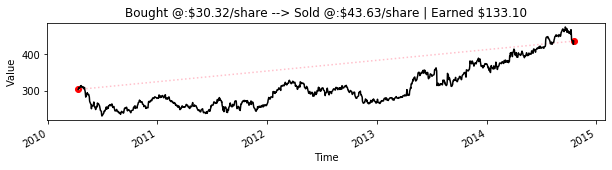

In [20]:
#see how much you would have made if you bought a sold on certain days
close.date_range('04-10-2010','10-20-2014').buy_hold(nshares=10,plot=True) 

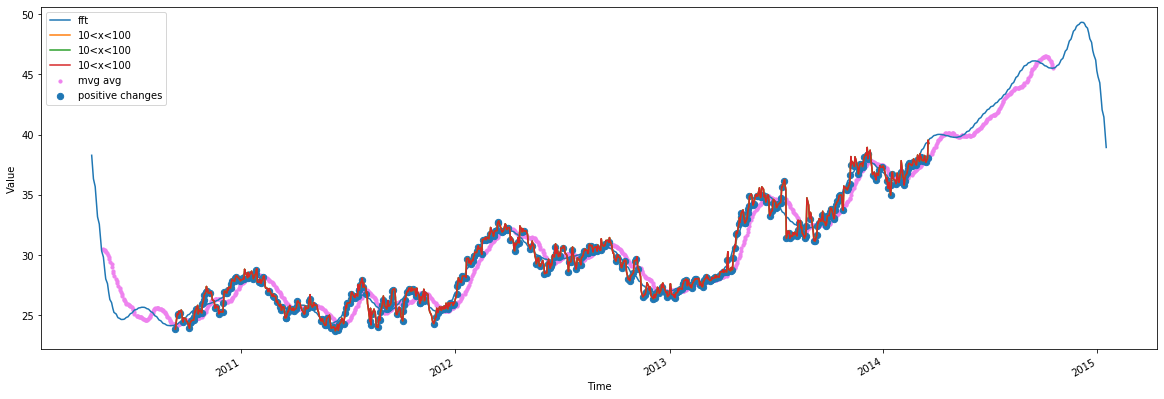

In [21]:
#quick advanced filtering techniques and plotting 
import matplotlib.pyplot as plt 
ft.trader_fig()
close.date_range('04-10-2010','10-20-2014').mvg_avg(window=21).scatter(s=10,color='violet',label='mvg avg') #mvg avg
close.date_range('04-20-2010','01-20-2015').fourier_decomp(ncomps=21).plot(label='fft')#fast fourier singal decomp
 
drange=close.date_range('9-10-2010','03-20-2014')
drange.query('(data>10) & (data<100)').plot(label='10<x<100')

drange.query('(data>10) & (data<100)').plot(label='10<x<100')
drange.greater_than(10).less_than(100).plot(label='10<x<100')#same thing as above line 
drange\
[drange.diff().sign().query('data>0',return_inds=True)[0]].scatter(s=40,label='positive changes')
                                                                                                                                                                
plt.legend()

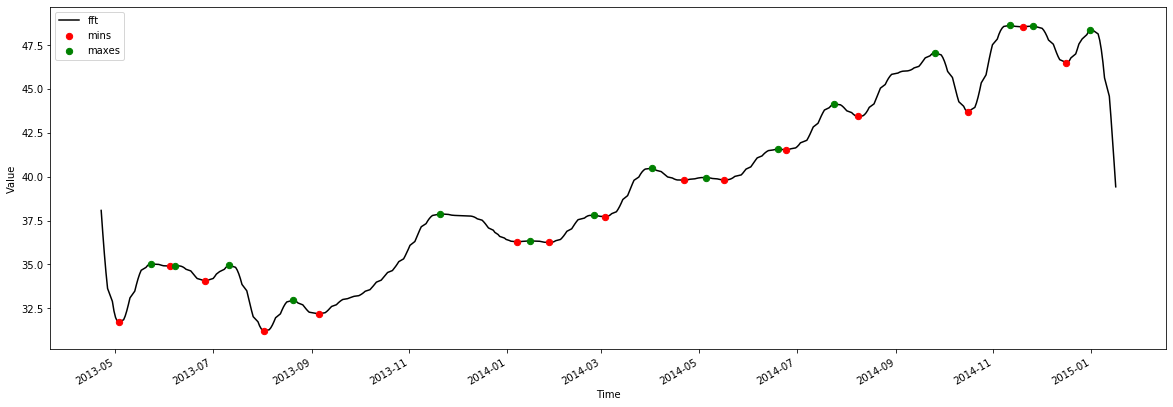

In [22]:
ft.trader_fig()
fft = close.date_range('04-20-2013','01-20-2015').fourier_decomp(ncomps=21)

fft.plot(color='black',label='fft',zorder=1)
mm= fft.minima_maxima() #using 2nd derivative to find mins and maxes of a function 
mm.mins.scatter(s=40,color='red',label='mins',zorder=2)
mm.maxes.scatter(s=40,color='green',label='maxes',zorder=3)
plt.legend()

In [23]:
close.dropna(inplace=None,newarray=True) # will return a new array without nulls if nulls are fine 

In [24]:
import pandas as pd 
import numpy as np 

#split on date, index, or %
close.split_on('01-10-2020'),close.split_on(1000),close.split_on(.6)

#simple stats 
close.mean() #mean 
close.std() #standard deviation 
close.var() #variance 

#easily go to numpy 
close.to_numpy()
np.array(close)
close.data

#multiple ways to convert to df as well 
pd.DataFrame(close) 
close.to_df()

close
1986-03-13 10:30:00    0.097222
1986-03-14 10:30:00    0.100694
1986-03-17 10:30:00    0.102431
1986-03-18 10:30:00    0.099826
1986-03-19 10:30:00    0.098090
...                         ...
2020-07-06 09:30:00  210.699997
2020-07-07 09:30:00  208.250000
2020-07-08 09:30:00  212.830002
2020-07-09 09:30:00  214.320007
2020-07-10 16:00:01  213.669998

[8653 rows x 1 columns]

In [25]:
# def vectorized_fuxn(x):
#     return x+2

apply_sum=close.np_func(np.sum,date_info=None)
print(apply_sum) #cann apply broad cast func 
apply_sum.date_assign(['01-10-2020']) # add date information
apply_sum 

<TraderArray:: shape=(1,), min=(263080.49), max=(263080.49), name="close">


<TraderArray:: shape=(1,), min=(263080.49), max=(263080.49), range=(01-10-2020,01-10-2020), name="close">

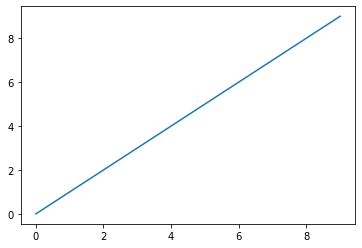

In [26]:
#Trader Arrays don need date info 

ft.TraderArray(data=np.arange(10),date_info=None,sort_dates=False).plot()

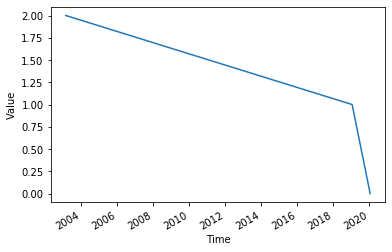

In [27]:
#date info can be any array like date info (pandas datetime, list of strings, list of datetimes. etc/// Just no nulls!)
ft.TraderArray(data=np.arange(3),date_info=['01-20-2020','01-20-2019','03-03-2003'],sort_dates=True).plot()

In [28]:
#in developement 
from fast_trader.models import tLSTM

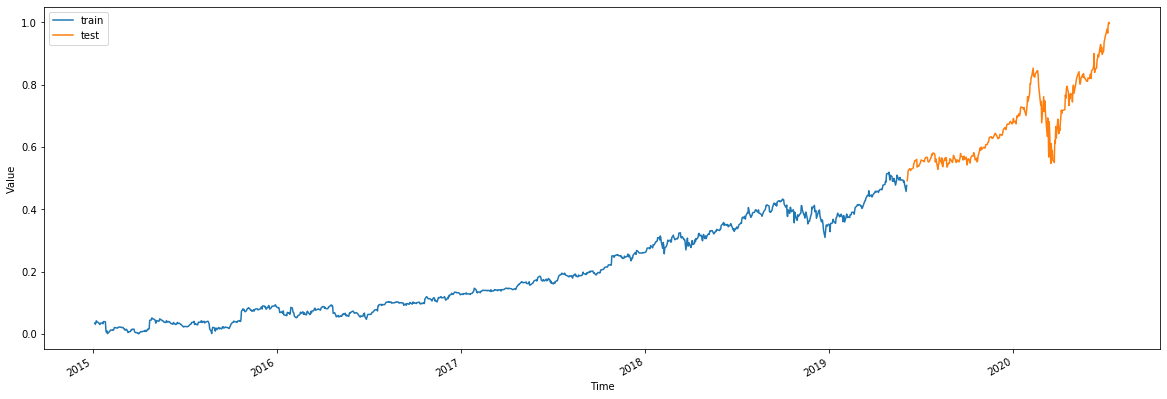

In [29]:
model =tLSTM(num_time_steps=50,val_split=None)#predict 50 time steps 


train_data,test_data= close.\
                        date_range('01-03-2015').\
                    minmax_scale(0,1).split_on(splitval=.8) #split on 90% of data + min max scaling #arr.standard_scale() also

ft.trader_fig()
train_data.plot(label= 'train')
test_data.plot(label='test')
plt.legend()

In [30]:
model.fit(train_data,epochs=10)

Train on 1060 samples
Epoch 1/10
1060/1060 [==============================] - 7s 7ms/sample - loss: 0.0312
Epoch 2/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0039
Epoch 3/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0034
Epoch 4/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0032
Epoch 5/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0031
Epoch 6/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0028
Epoch 7/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0030
Epoch 8/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0026
Epoch 9/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0028
Epoch 10/10
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.0029


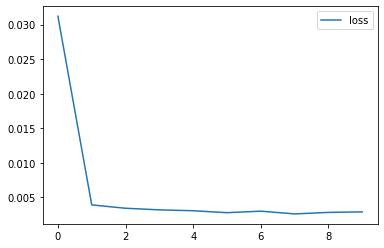

In [31]:
import pandas as pd
pd.DataFrame(model.lstm.history.history).plot()

In [49]:
preds= model.lstm.predict(model._batchify(test_data.data)[0])

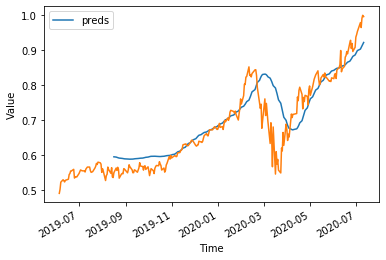

In [52]:
preds_arr= ft.TraderArray(preds.squeeze(),test_data.date_info[-227:])
preds_arr.plot(label='preds')
test_data.plot()
plt.legend()

In [48]:
preds.shape

(227, 1)